<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [33]:
sleep_data = 'C:/Users/Theodore/Desktop/ECON628-01/datasets/sleep/sleep_bh.csv'

sleepdf = pd.read_csv(sleep_data)

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [34]:
sleepdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [35]:
sleepdf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,706.0,38.815864,11.342637,23.000000,29.00,36.000000,48.000000,65.000000
black,706.0,0.049575,0.217219,0.000000,0.00,0.000000,0.000000,1.000000
case,706.0,353.500000,203.948932,1.000000,177.25,353.500000,529.750000,706.000000
clerical,706.0,0.182331,0.335413,0.000000,0.00,0.000000,0.182331,1.000000
construc,706.0,0.030075,0.148366,0.000000,0.00,0.000000,0.030075,1.000000
educ,706.0,12.780453,2.784702,1.000000,12.00,12.000000,16.000000,17.000000
earns74,706.0,9767.705382,9323.588151,0.000000,2500.00,8250.000000,13750.000000,42500.000000
gdhlth,706.0,0.890935,0.311942,0.000000,1.00,1.000000,1.000000,1.000000
inlf,706.0,0.753541,0.431254,0.000000,1.00,1.000000,1.000000,1.000000
leis1,706.0,4690.723796,908.049561,1745.000000,4109.75,4620.000000,5203.750000,7417.000000


In [36]:
sleepdf.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

In [11]:
#Only hrwage and, consequently log of hourly wage have missing values.      

In [37]:
sleepdf1 = sleepdf.dropna()

In [38]:
sleepdf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 34 columns):
age         532 non-null int64
black       532 non-null int64
case        532 non-null int64
clerical    532 non-null float64
construc    532 non-null float64
educ        532 non-null int64
earns74     532 non-null int64
gdhlth      532 non-null int64
inlf        532 non-null int64
leis1       532 non-null int64
leis2       532 non-null int64
leis3       532 non-null int64
smsa        532 non-null int64
lhrwage     532 non-null float64
lothinc     532 non-null float64
male        532 non-null int64
marr        532 non-null int64
prot        532 non-null int64
rlxall      532 non-null int64
selfe       532 non-null int64
sleep       532 non-null int64
slpnaps     532 non-null int64
south       532 non-null int64
spsepay     532 non-null int64
spwrk75     532 non-null int64
totwrk      532 non-null int64
union       532 non-null int64
worknrm     532 non-null int64
workscnd    532 non

In [39]:
#Now there are 532 observations and no missing values.

## 3. Check for correlations
    Implement a correlation heatmap
---

In [41]:
cols = list(sleepdf1.columns.values)

cols

['age',
 'black',
 'case',
 'clerical',
 'construc',
 'educ',
 'earns74',
 'gdhlth',
 'inlf',
 'leis1',
 'leis2',
 'leis3',
 'smsa',
 'lhrwage',
 'lothinc',
 'male',
 'marr',
 'prot',
 'rlxall',
 'selfe',
 'sleep',
 'slpnaps',
 'south',
 'spsepay',
 'spwrk75',
 'totwrk',
 'union',
 'worknrm',
 'workscnd',
 'exper',
 'yngkid',
 'yrsmarr',
 'hrwage',
 'agesq']

In [49]:
sns.heatmap?

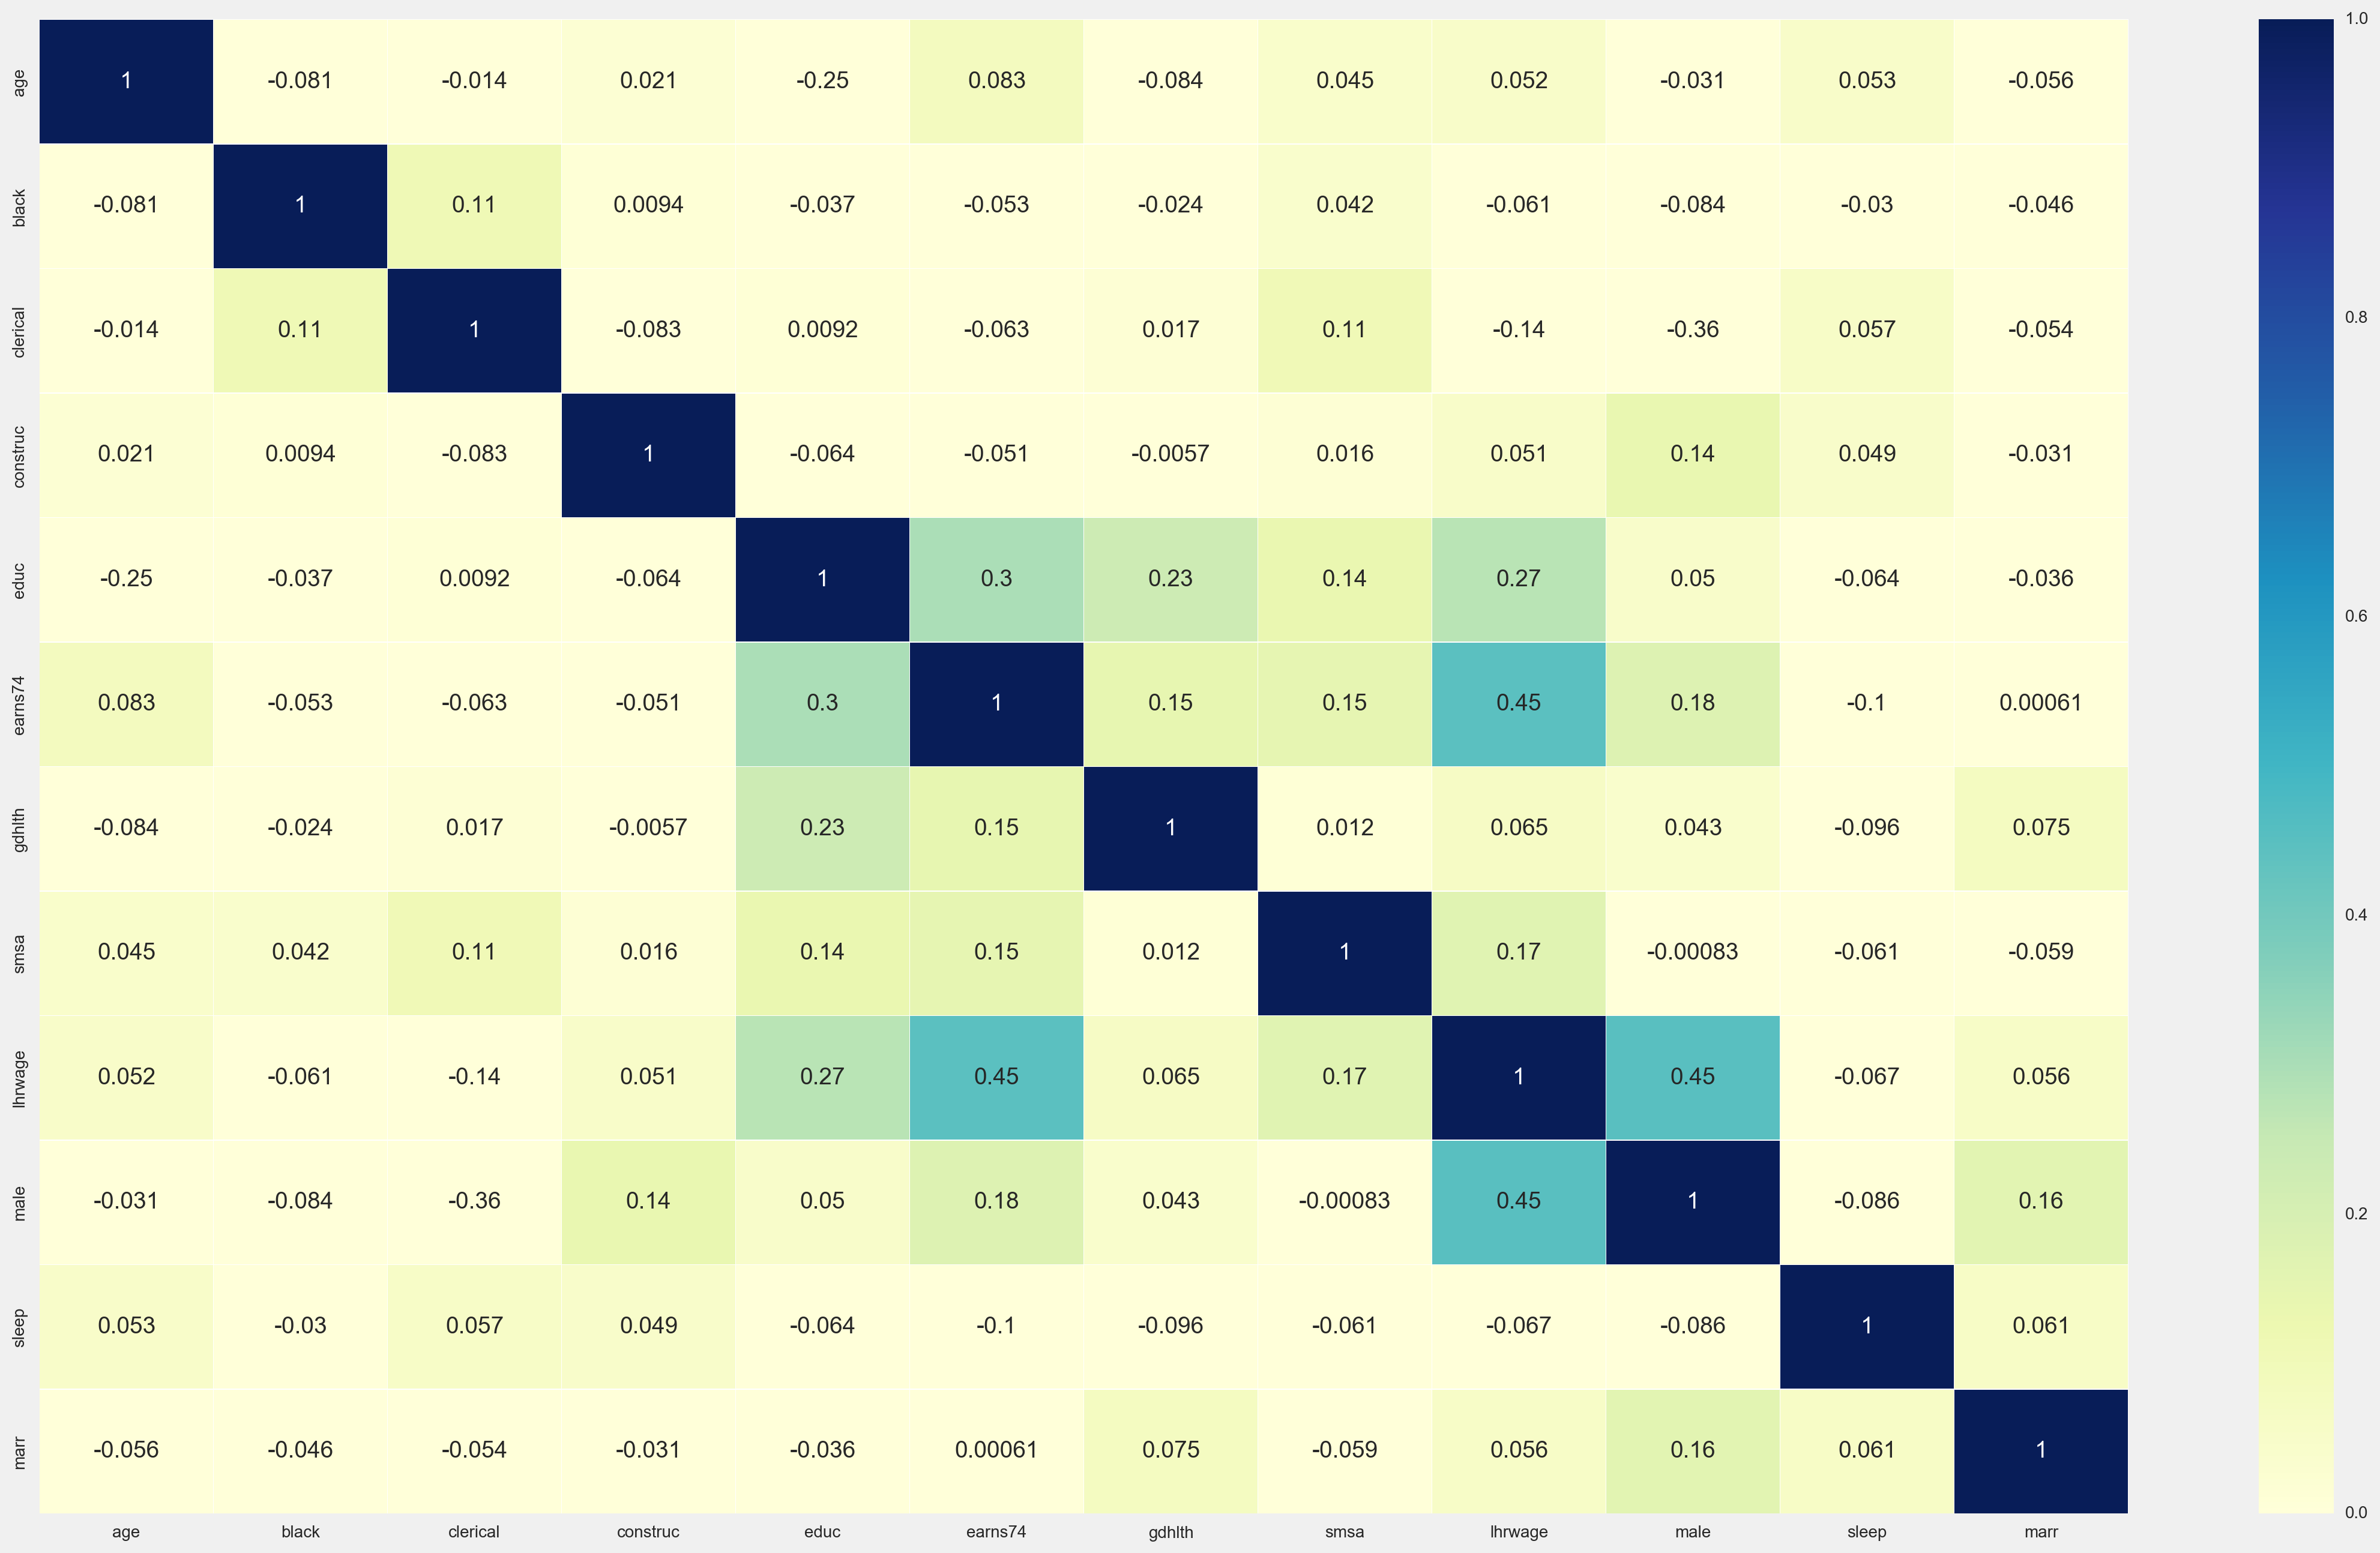

In [51]:
core_var=sleepdf1[['age',
 'black',
 'clerical',
 'construc',
 'educ',
 'earns74',
 'gdhlth',
 'smsa',
 'lhrwage',
 'male',
 'sleep',                  
 'marr']]

fig = plt.figure(figsize=(25,15))
ax = fig.gca()
sns.heatmap(core_var.corr(), annot=True, linewidths=.15, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()


In [ ]:
#some fairly predictable basic correlations appear here such as a correlation between the three slightly varying variables of
#leisure but also between age and experience and gender and pay.

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [108]:
#Only excluded the x variables specified above, and protestant, as I believe a case could be made that the rest may affect
#the amount of time sleeping. I also think that perhaps the leis columns could be left out as they are made up entirely of 
#the sleep variable and other variables.

target = 'sleep'
y = sleepdf1[target]
print type(y)

X = sleepdf1[['age',
 'black',
 'clerical',
 'construc',
 'educ',
 'earns74',
 'gdhlth',
 'inlf',
 'smsa',
 'lhrwage',
 'male',
 'marr',
 'rlxall',
 'selfe',
 'south',
 'spsepay',
 'spwrk75',
 'totwrk',
 'union',
 'worknrm',
 'workscnd',
 'exper',
 'yngkid',
 'yrsmarr',
 'hrwage',
 'agesq']]
print type(X)

print y.shape, X.shape

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(532L,) (532, 26)


In [109]:
#Shapes of the predictor and target matrices match up with 27 total predictors for sleep

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
ss=StandardScaler()

In [112]:
#Standardizing x's
Xn = ss.fit_transform(X)

In [113]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372, 26) (372L,)
(160, 26) (160L,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

In [114]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

## 4.2.1 OLS
    
---

In [115]:
lm = linear_model.LinearRegression() 

In [116]:
model = lm.fit(X, y)

predictions = lm.predict(X)
predictions.shape

(532L,)

In [117]:
print sleepdf1['sleep'].mean()
print predictions.mean()

3259.46616541
3259.46616541


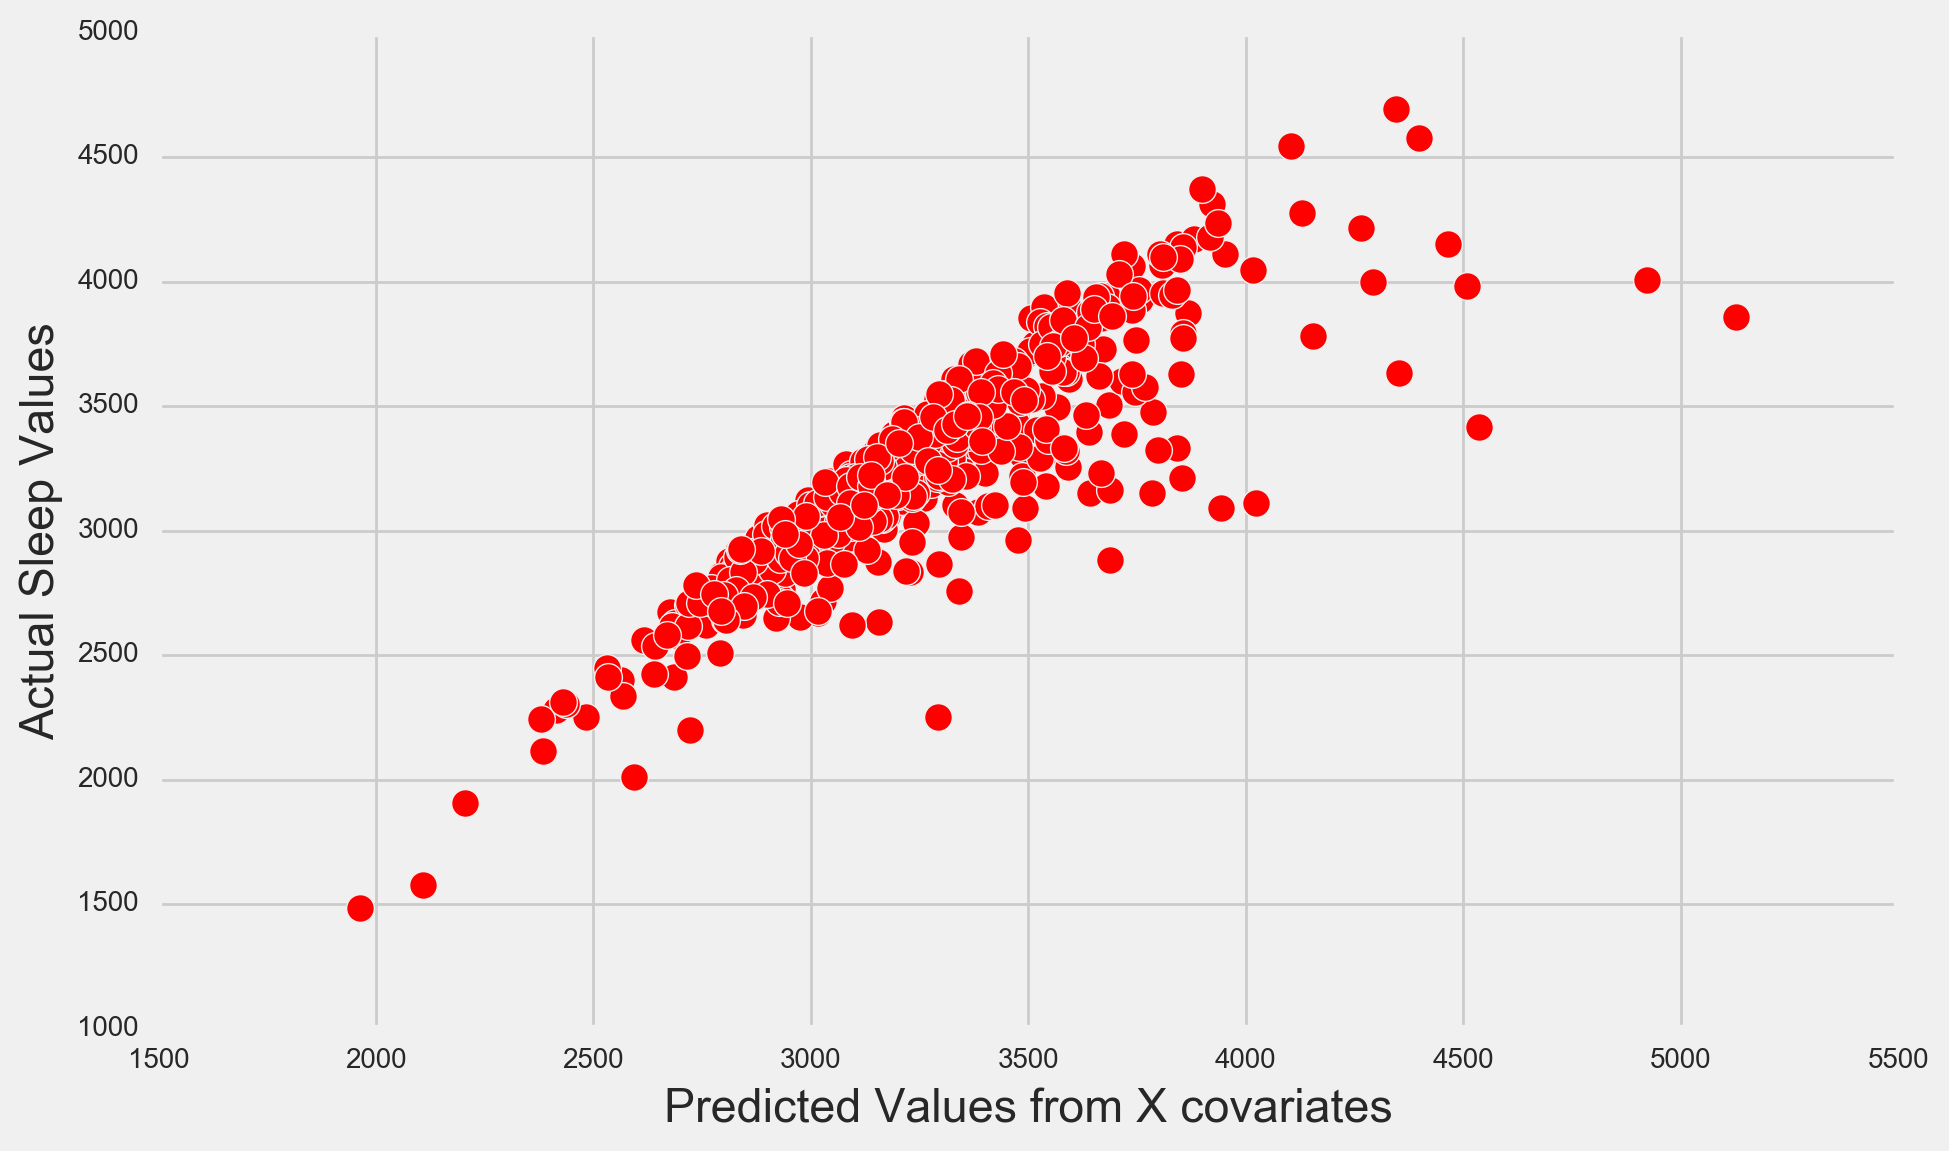

MSE: 47810.9478016


In [118]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='r', marker='o')
plt.xlabel("Predicted Values from X covariates")
plt.ylabel("Actual Sleep Values")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [134]:
# The MSE from the linear regression method indicates a pretty good performance.

## 4.2.2 Regularization
    
---

In [120]:
#Using normalized values of x covariates for the train and test data
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372L, 26L) (372L,)
(160L, 26L) (160L,)


In [121]:
#Finding optimal Alpha for ridge regression
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

10.235310219


In [122]:
# defining and fitting the ridge model

ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=10.235310218990264, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [124]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [125]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 43929.18, test data: 59292.79
R^2 Ridge train data: 0.77, test data: 0.67


In [133]:
#MSE for the Ridge Regression is larger than the linear regression.  The R^2 values are relatively close.

In [127]:
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

15.2456396528


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [128]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(X_train, y_train)

Lasso(alpha=15.245639652825107, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 45869.17, test data: 57418.16
R^2 Lasso train data: 0.76, test data: 0.68


In [ ]:
#Lasso by itself doesnt perform nearly as well as the Ridge Regression....What about elastic net...?

In [130]:
#Finding the optimal values of the alphas for the two-part elastic net regularization method..
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

15.6019576728
1.0


.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   16.2s finished


In [131]:
#Same steps as before of fitting the ideal found alphas printed out above to the Elastic Net model
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
enet.fit(X_train, y_train)

ElasticNet(alpha=15.601957672814894, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [132]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 45908.29, test data: 57411.35
R^2 Elastic Net train data: 0.76, test data: 0.68


In [135]:
# elasticnet outperforms the other regularization methods slightly

## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [105]:
#Citing from MegaLab Notebook is the function that can return coefficients.

def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    
    return method_coefs.head(27)

In [136]:
best_reg_method(X, ridge)

,abs_coef,coef,variable
12,364.015379,364.015379,rlxall
11,27.473443,27.473443,marr
22,23.891657,23.891657,yngkid
10,20.164256,-20.164256,male
18,17.893200,17.893200,union
23,12.232742,-12.232742,yrsmarr
24,11.119355,11.119355,hrwage
8,9.610678,-9.610678,smsa
15,9.606688,-9.606688,spsepay
3,8.844074,8.844074,construc


In [137]:
#besides the relaxing variable marriage is a strong predictor of sleep with a positive coefficient

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [139]:
#Using the parameters for the regression tree from MegaLab Notebook.

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#The parameters for the gridsearch:
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

#cross validation of 10 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=10, verbose=0)

In [140]:
dtr_gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [147]:

#using this definition as the selection of overall best fits
dectree_best = dtr_gs.best_estimator_ 
print "\n*****************************************************************************************************\n"
print "best estimator", dectree_best
print "\n*****************************************************************************************************\n"
print "best parameters",  dtr_gs.best_params_
print "\n******************************************************************************************************\n"
print "best score", dtr_gs.best_score_


*****************************************************************************************************

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

*****************************************************************************************************

best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5}

******************************************************************************************************

best score 0.75005404375


In [149]:
#displaying most prominent features that result from the chosen parameters of the regression tree, function syntax from MegaLab Notebook

def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'variable':X.columns, 'rating':best_model.feature_importances_})
    feature_importance.sort_values('rating', ascending=False, inplace=True)
    return feature_importance 

In [150]:
feature_importance(X, dectree_best)

,rating,variable
12,0.990352,rlxall
21,0.009648,exper
0,0.000000,age
14,0.000000,south
24,0.000000,hrwage
23,0.000000,yrsmarr
22,0.000000,yngkid
20,0.000000,workscnd
19,0.000000,worknrm
18,0.000000,union


In [151]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dectree_best)

MSE Regression tree train data: 36609.77, test data: 56129.91
R^2 Regression tree train data: 0.81, test data: 0.69


In [152]:
#Decision Trees is the best performer so far but it starts to overfit on the training data by the R^2 values

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [156]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }
#Gridsearch function on the above set parameters
estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=0)

In [157]:
estimator_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [158]:
#using this definition as the selection of overall best fits
randfor_best = estimator_rfr.best_estimator_
print "\n*****************************************************************************************************\n"
print "best estimator", randfor_best
print "\n*****************************************************************************************************\n"
print "best parameters",  estimator_rfr.best_params_
print "\n******************************************************************************************************\n"
print "best score", estimator_rfr.best_score_


*****************************************************************************************************

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=6, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

*****************************************************************************************************

best parameters {'min_samples_split': 4, 'max_leaf_nodes': 6, 'n_estimators': 100, 'max_depth': 3}

******************************************************************************************************

best score 0.767730731059


In [159]:
feature_importance(X, dectree_best)

,rating,variable
12,0.990352,rlxall
21,0.009648,exper
0,0.000000,age
14,0.000000,south
24,0.000000,hrwage
23,0.000000,yrsmarr
22,0.000000,yngkid
20,0.000000,workscnd
19,0.000000,worknrm
18,0.000000,union


In [160]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", randfor_best)

MSE Random Forest Regression tree train data: 34056.56, test data: 52357.71
R^2 Random Forest Regression tree train data: 0.82, test data: 0.71


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In my opinion the Random Forest Estimator is the best option for the PI in order to predict sleep hours. It has an MSE lower than any of the other models, the R2 on the training data isn't completely over the top, and the R^2 in the testing data is not too far off from that of the training data, indicating likelihood of external validity.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Absolutely. For instance in the lasso regularization method, A higher R^2 would have been easily attained if more variables would have been introduced, but this vay have led to more bias in the testing data. 

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

In decision trees and random forests, the more breaks, or decisions there exist in the model to fit the training set of data, the lower the variance will be in the predicted model but it will likely suffer more bias when applied to the testing set.